# Titanic - Machine Learning from Disaster

# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EDA

# Missing Data

In [5]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Using below technique wont help us undertand the Null values clearly. Since there are many records, we will be unable to see all the Null values in a particular column. Also Jupyter notebook fails to display all the records it skips some of the rows. To overcome this, we can use Visualization concept for this we can use Seaborn. There is heatmap concept which we wull be using, this heatmap will halp us to see that whatever condition we will be putting for example train_data.isnull(), this will be displayed in a different color.

<AxesSubplot:>

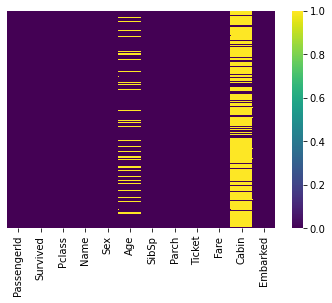

In [6]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='viridis')

In the above heatmap, the null values are indicated in yellow. Also we see that there are many Null values in Age and Cabin columns.

Looking into the heatmap, we can see that Cabin has maximum number of Null values which tells us that its not that important for our prediction hence we can drop this column.
Also roughly around 20% of Age data is missing which is small enough. Hence we can replace with mean/median values.

Now lets continue by visualizing some more of the data

We are plotting a countplot for Survive Column and see how many survived and how may dint.
0 - Not Survived
1 - Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

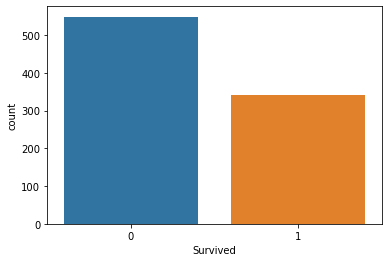

In [7]:
sns.countplot(x='Survived',data=train_data)

In the above countplot, we can tell that more than 500 people didnt survive,whereas some people say more than 300 people survived.

Now lets plot the same countplot and check how many male or female survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

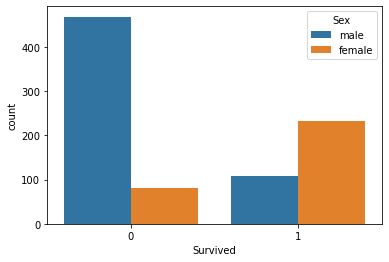

In [8]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

From the above plot, we can tell that more than 400 males didnt survive and around 50 females didnt survive.
Whereas, more than 200 females survived and more than 100 males survived.

Now lets continue with the countplot, and check if we can find that is there any relation with Survived and Passenger(PClass).


<AxesSubplot:xlabel='Survived', ylabel='count'>

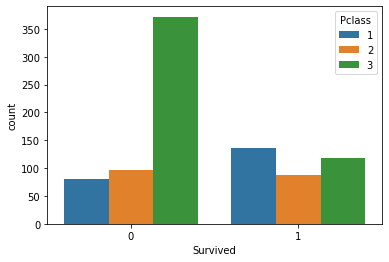

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

From the above plot, we can say that more than 350 passengers in Passenger Class 3 didnt survive. Whereas, more than 100 passengers in Passenger class 1 survived.

Histogram provides the count of the people within a range.
Now lets plot an histogram for Age column, to see the distribution of age whether it follows Normal distribution or ot.

<AxesSubplot:>

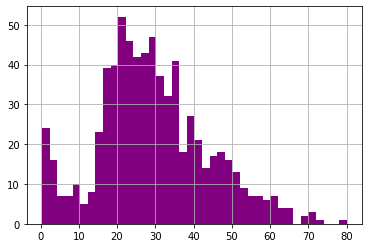

In [10]:
train_data['Age'].hist(bins=40,color='purple')

In the above histogram, we can see the age is distributed normally as we can see it has formed a bell curve.
Here we are plotting the frequency for Age column hence the X-Axis is Age.

Now lets plot the countplot for SibSp and see how many passengers travelled with Sibblings or Spouses

<AxesSubplot:xlabel='SibSp', ylabel='count'>

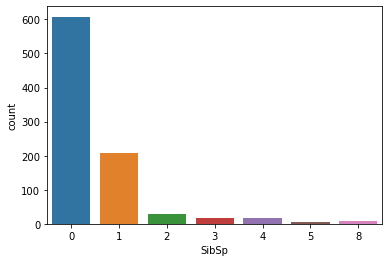

In [11]:
sns.countplot(x='SibSp',data=train_data)

In the above countplot, we can say that many didnt travel with their sibbling and spouse.

Now, lets plot a Histogram for Fare column, to see the average fare 

<AxesSubplot:>

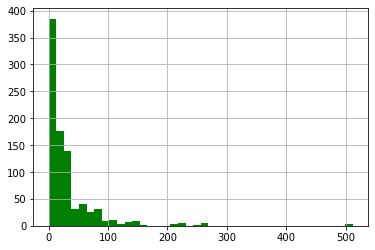

In [12]:
train_data['Fare'].hist(bins=40,color='green')

# Data Cleaning

Lets fill in the missing age data instead of just dropping the missing age data row.One way to do this is by filling in the mean age of all the passengers.However we can be smarter about this and check the average age by passenger class. For example: 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

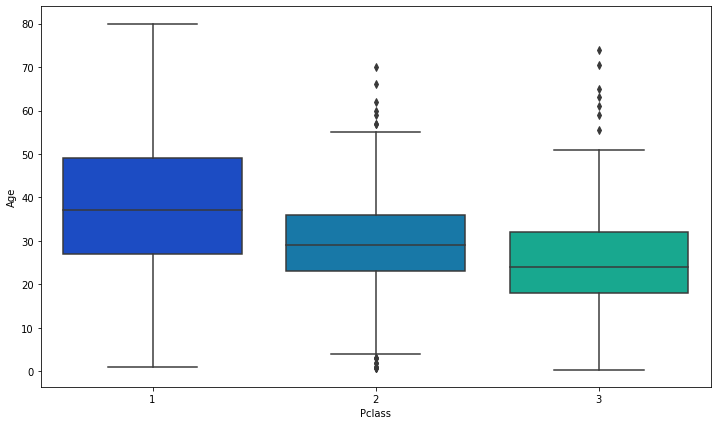

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

We can see that wealthier passengers in the higher classes tend to be older, which makes sense. We will use these average values to impute based on PClass for Age

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

Now apply that function

In [15]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age, axis = 1)

Now let check that heap map again

<AxesSubplot:>

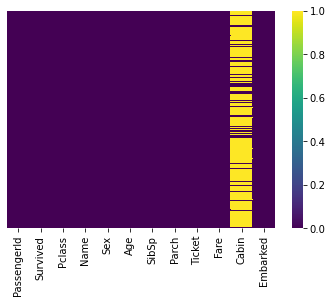

In [16]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='viridis')

Now we see that Age column has no more empty values 

Great!Lets go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [17]:
train_data.drop('Cabin',axis=1,inplace=True)

In [18]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

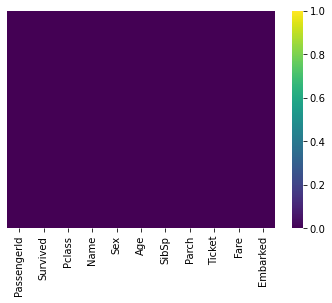

In [19]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='viridis')

Now we dont have any null values

# Converting Categorical Features

We will need to convert categorical features to dummy variables using Pandas. Otherwise our machine learning algorithms wont be able to directly take those features as inputs.

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


get_dummies: Represent it converts that many number of columns 
drop_first: We can remove the first column since other two will represent the first column

In [21]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [22]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [24]:
train_data = pd.concat([train_data,sex,embark],axis=1)

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now our dependent variable is Survivd and remaining all are independent variables

# Building a Logistic Regression Model

Lets drop Survived column since its our dependent variable

In [26]:
train_data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [27]:
train_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [29]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
from sklearn.model_selection import train_test_split

Now, lets split the data into train and test, train.drop('Survived',axis=1) is X and train['Survived'] is Y 

In [31]:

X_train,X_test,y_train,y_test = train_test_split(train_data.drop('Survived',axis=1),train_data['Survived'], test_size=0.20,random_state=13)

In [32]:
y_test

736    0
421    0
442    0
196    0
200    0
      ..
603    0
750    1
185    0
644    1
815    0
Name: Survived, Length: 179, dtype: int64

# Training and Predicting

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\nisch\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
accuracy = confusion_matrix(y_test,predictions)

In [38]:
accuracy

array([[95, 15],
       [18, 51]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(y_test,predictions)

In [41]:
accuracy

0.8156424581005587

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [44]:
predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [46]:
predictions_random_forest = classifier.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
accuracy_random_forest = confusion_matrix(y_test,predictions_random_forest)

In [49]:
accuracy_random_forest

array([[99, 11],
       [18, 51]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_random_forest = accuracy_score(y_test,predictions_random_forest)

In [52]:
accuracy_random_forest

0.8379888268156425

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions_random_forest))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [55]:
predictions_random_forest

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [56]:
y_test

736    0
421    0
442    0
196    0
200    0
      ..
603    0
750    1
185    0
644    1
815    0
Name: Survived, Length: 179, dtype: int64

# XG BOOST CLASSIFIER

In [100]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[02:38:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nisch\Downloads\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[94 16]
 [18 51]]


0.8100558659217877

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Support Vector Machine

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
X_train

array([[ 1.02177218, -1.53184784,  0.59264672, ...,  0.71980808,
        -0.29780029,  0.61414657],
       [ 0.30479378,  0.84435186,  0.85511326, ...,  0.71980808,
         3.35795504, -1.62827579],
       [-1.42597666,  0.84435186, -0.38222902, ...,  0.71980808,
        -0.29780029,  0.61414657],
       ...,
       [-1.4336861 ,  0.84435186,  0.21769451, ...,  0.71980808,
        -0.29780029,  0.61414657],
       [-1.0405044 ,  0.84435186, -0.38222902, ...,  0.71980808,
        -0.29780029,  0.61414657],
       [-0.41603934,  0.84435186,  1.19257025, ...,  0.71980808,
        -0.29780029,  0.61414657]])

In [63]:
X_test

array([[ 1.11814024,  0.84435186,  1.41754157, ..., -1.38925921,
        -0.29780029,  0.61414657],
       [-0.09609737,  0.84435186, -0.60720034, ...,  0.71980808,
         3.35795504, -1.62827579],
       [-0.01514819,  0.84435186, -0.30723858, ...,  0.71980808,
        -0.29780029,  0.61414657],
       ...,
       [-1.0058119 , -1.53184784,  0.59264672, ...,  0.71980808,
        -0.29780029,  0.61414657],
       [ 0.76350577,  0.84435186, -2.12575677, ..., -1.38925921,
        -0.29780029, -1.62827579],
       [ 1.42266333, -1.53184784,  0.59264672, ...,  0.71980808,
        -0.29780029,  0.61414657]])

In [64]:
from sklearn.svm import SVC
classifiersvc = SVC()
classifiersvc.fit(X_train, y_train)


SVC()

In [65]:
y_pred_svc = classifiersvc.predict(X_test)

In [66]:
y_pred_svc

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [67]:
y_pred_svc.shape

(179,)

In [68]:
X_test.shape

(179, 9)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_svm = accuracy_score(y_test,y_pred_svc)

In [71]:
accuracy_svm

0.8491620111731844

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       110
           1       0.88      0.71      0.78        69

    accuracy                           0.85       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



In [74]:
train_data.shape

(891, 10)

In [75]:
test.shape

(418, 11)

In [76]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [77]:
X_test

array([[ 1.11814024,  0.84435186,  1.41754157, ..., -1.38925921,
        -0.29780029,  0.61414657],
       [-0.09609737,  0.84435186, -0.60720034, ...,  0.71980808,
         3.35795504, -1.62827579],
       [-0.01514819,  0.84435186, -0.30723858, ...,  0.71980808,
        -0.29780029,  0.61414657],
       ...,
       [-1.0058119 , -1.53184784,  0.59264672, ...,  0.71980808,
        -0.29780029,  0.61414657],
       [ 0.76350577,  0.84435186, -2.12575677, ..., -1.38925921,
        -0.29780029, -1.62827579],
       [ 1.42266333, -1.53184784,  0.59264672, ...,  0.71980808,
        -0.29780029,  0.61414657]])

In [78]:
test_Survived = pd.Series(classifiersvc.predict(X_test), name="Survived")


In [79]:
ID_column = test["PassengerId"]
results = pd.concat([ID_column, test_Survived], axis=1)


In [90]:
results

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,NaN
414,1306,NaN
415,1307,NaN
416,1308,NaN


In [91]:
results_submission = results['Survived'].fillna(0)

In [92]:
results_final_output = pd.concat([ID_column, results_submission], axis=1)

In [93]:
results_final_output

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,0.0
415,1307,0.0
416,1308,0.0


In [95]:
results_final_output

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,0.0
415,1307,0.0
416,1308,0.0


In [97]:
final_submission = np.rint(results_final_output).astype(np.int)



<ipython-input-97-6fac85af994b>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  final_submission = np.rint(results_final_output).astype(np.int)


In [98]:
final_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [99]:
final_submission.to_csv("svm_linear.csv",index = False)


Since its a binary classification problem statement to predict which passengers survived the tragedy, initially Logistic Regression Model was chosen. The accuracy for Logistic Regression Model was pretty decent. 

However, by using other Supervised Learning models such as;
Random Forest, XG Boost and Support Vector Machine.
The accuracy achieved using SVM was comparitively high. 
I finally conclude, the accuracy score for SVM is high because it uses Ensembling technique and advantage is that it wont have overfit issue. 
